<a href="https://colab.research.google.com/github/hassang66/Computer-Vision-Capstone-Project/blob/main/notebooks/Computer_Vision%2BCapstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

labels_dir = '/content/drive/MyDrive/Datasets/yolo_format/labels/train'
images_dir = '/content/drive/MyDrive/Datasets/yolo_format/images/train'


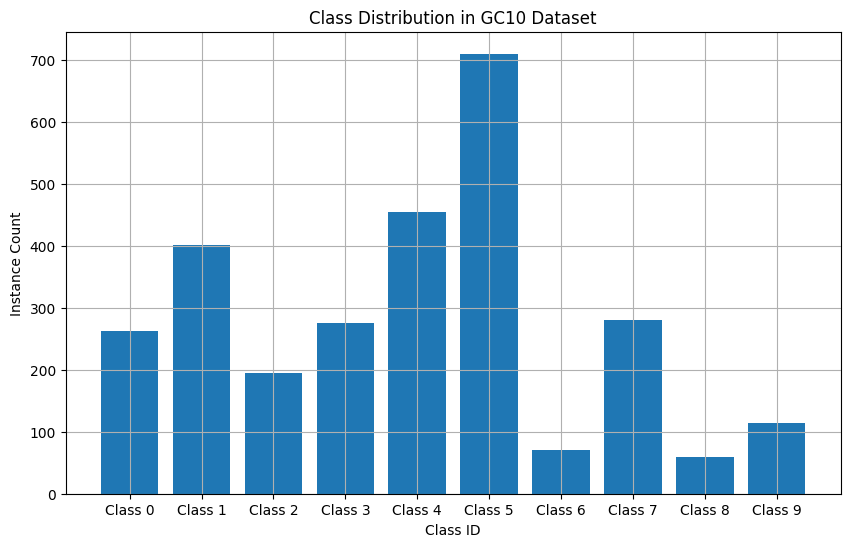

In [3]:
import glob
import matplotlib.pyplot as plt

class_counts = [0] * 10  # GC10 has 10 defect types

label_files = glob.glob(os.path.join(labels_dir, '*.txt'))

for file in label_files:
    with open(file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 1:
                class_id = int(parts[0])
                if 0 <= class_id < len(class_counts):
                    class_counts[class_id] += 1

# Plot distribution
plt.figure(figsize=(10, 6))
plt.bar(range(10), class_counts, tick_label=[f'Class {i}' for i in range(10)])
plt.title('Class Distribution in GC10 Dataset')
plt.xlabel('Class ID')
plt.ylabel('Instance Count')
plt.grid(True)
plt.show()


In [6]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [7]:
from ultralytics import YOLO
model = YOLO('yolov8s.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 192MB/s]


In [8]:
save_dir = '/content/drive/MyDrive/Datasets/yolo_runs'
results = model.train(
    data='/content/drive/MyDrive/Datasets/yolo_format/gc10.yaml',
    epochs=30,
    imgsz=640,
    batch=16,
    lr0=0.01,
    project=save_dir,
    name='gc10_yolov8s',
    save_period=5
)


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Datasets/yolo_format/gc10.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=gc10_yolov8s, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

100%|██████████| 755k/755k [00:00<00:00, 118MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

Model summary: 129 layers, 11,139,470 parameters, 11,139,454 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 266MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.4±0.0 MB/s, size: 408.9 KB)


train: Scanning /content/drive/MyDrive/Datasets/yolo_format/labels/train... 1826 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1826/1826 [01:11<00:00, 25.59it/s] 


train: New cache created: /content/drive/MyDrive/Datasets/yolo_format/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.9±0.9 ms, read: 0.4±0.2 MB/s, size: 366.9 KB)


val: Scanning /content/drive/MyDrive/Datasets/yolo_format/labels/val... 454 images, 0 backgrounds, 0 corrupt: 100%|██████████| 454/454 [06:31<00:00,  1.16it/s]

val: New cache created: /content/drive/MyDrive/Datasets/yolo_format/labels/val.cache


Plotting labels to /content/drive/MyDrive/Datasets/yolo_runs/gc10_yolov8s/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Datasets/yolo_runs/gc10_yolov8s
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       3.7G      2.162       4.28      1.726          7        640: 100%|██████████| 115/115 [01:04<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.84it/s]


                   all        454        718      0.431      0.426      0.368      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.91G      1.971      2.153       1.59         10        640: 100%|██████████| 115/115 [00:53<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.15it/s]

                   all        454        718      0.604      0.404      0.422       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.93G      1.947      1.995      1.614          8        640: 100%|██████████| 115/115 [00:56<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]

                   all        454        718      0.645      0.431      0.445      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.96G      1.923      1.925      1.601          9        640: 100%|██████████| 115/115 [00:55<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]


                   all        454        718      0.482      0.484      0.452       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.98G      1.892      1.791       1.58          6        640: 100%|██████████| 115/115 [00:56<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]

                   all        454        718      0.589      0.521      0.515      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.03G      1.859      1.758      1.536          9        640: 100%|██████████| 115/115 [00:57<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.31it/s]


                   all        454        718      0.713      0.448      0.455      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.03G      1.831      1.714      1.518          6        640: 100%|██████████| 115/115 [00:55<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.09it/s]

                   all        454        718      0.496      0.531      0.523      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.03G      1.823      1.689      1.519          3        640: 100%|██████████| 115/115 [00:57<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]

                   all        454        718      0.501      0.563      0.555      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.03G      1.796      1.637      1.497          8        640: 100%|██████████| 115/115 [00:57<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.16it/s]


                   all        454        718      0.513       0.59      0.551      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.03G      1.775       1.57      1.494          6        640: 100%|██████████| 115/115 [00:55<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.23it/s]


                   all        454        718       0.67       0.55      0.585       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.03G      1.752      1.535      1.468          4        640: 100%|██████████| 115/115 [00:57<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]

                   all        454        718      0.658      0.552      0.585      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.07G      1.708      1.509      1.442          4        640: 100%|██████████| 115/115 [00:56<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.35it/s]

                   all        454        718        0.6      0.553      0.589      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.07G      1.715      1.494       1.47          6        640: 100%|██████████| 115/115 [00:57<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.13it/s]

                   all        454        718      0.739      0.513       0.57      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.07G      1.686      1.422      1.438          5        640: 100%|██████████| 115/115 [00:56<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.17it/s]


                   all        454        718       0.65      0.555      0.583      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.07G      1.684      1.392      1.421          2        640: 100%|██████████| 115/115 [00:55<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.11it/s]

                   all        454        718      0.564      0.579      0.582      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.07G      1.652       1.37      1.396          3        640: 100%|██████████| 115/115 [00:55<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.24it/s]

                   all        454        718      0.658      0.595      0.638      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.07G      1.633      1.322      1.395          6        640: 100%|██████████| 115/115 [00:56<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.52it/s]

                   all        454        718      0.583      0.566      0.567      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.11G      1.615      1.314      1.386          5        640: 100%|██████████| 115/115 [00:56<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]

                   all        454        718      0.577      0.624      0.594       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.14G      1.616      1.299       1.39          6        640: 100%|██████████| 115/115 [00:55<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]


                   all        454        718      0.764      0.568      0.648      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.18G      1.615      1.273      1.368          9        640: 100%|██████████| 115/115 [00:56<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]

                   all        454        718      0.608      0.635      0.632      0.303


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.18G      1.729      1.323      1.429          2        640: 100%|██████████| 115/115 [00:57<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]


                   all        454        718      0.659      0.599      0.622      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.18G      1.672      1.238        1.4          6        640: 100%|██████████| 115/115 [00:54<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.30it/s]

                   all        454        718      0.693      0.616      0.656      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.18G      1.671      1.198      1.396          3        640: 100%|██████████| 115/115 [00:56<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]

                   all        454        718      0.691      0.625      0.674      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.18G      1.646      1.199      1.378          7        640: 100%|██████████| 115/115 [00:56<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.44it/s]

                   all        454        718      0.634      0.675      0.685      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.18G      1.613       1.12      1.348          2        640: 100%|██████████| 115/115 [00:55<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]

                   all        454        718      0.689      0.659      0.708      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.18G      1.598      1.097      1.349          5        640: 100%|██████████| 115/115 [00:55<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.41it/s]

                   all        454        718      0.694      0.643       0.68      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.18G      1.571      1.067      1.325          2        640: 100%|██████████| 115/115 [00:54<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]

                   all        454        718      0.671      0.659      0.691       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.18G      1.548      1.059      1.322          6        640: 100%|██████████| 115/115 [00:54<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.32it/s]

                   all        454        718      0.654      0.667      0.687       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.18G      1.528       1.01      1.304          2        640: 100%|██████████| 115/115 [00:55<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]

                   all        454        718      0.678      0.662       0.69      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.18G      1.517     0.9976      1.301          3        640: 100%|██████████| 115/115 [00:56<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        454        718      0.758      0.608      0.686      0.343



30 epochs completed in 0.539 hours.
Optimizer stripped from /content/drive/MyDrive/Datasets/yolo_runs/gc10_yolov8s/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/Datasets/yolo_runs/gc10_yolov8s/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/Datasets/yolo_runs/gc10_yolov8s/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.27it/s]


                   all        454        718      0.758      0.608      0.686      0.343
         Punching Hole         61         61      0.967      0.967      0.987      0.587
       Cold Seal Issue        103        104      0.776      0.875      0.855       0.35
        Missing Corner         68         69      0.872      0.884      0.957      0.649
            Water Spot         65         76      0.926       0.75      0.838      0.499
              Oil Spot         47        115      0.811      0.522      0.666      0.289
           Broken Edge        141        174       0.65      0.523       0.61      0.239
           Indentation          7         13      0.236      0.154      0.145     0.0587
        Foreign Matter         39         64       0.61      0.156      0.298      0.108
             Fold Mark         11         14      0.867      0.571      0.689       0.23
            Distortion         28         28       0.86      0.679      0.815      0.417
Speed: 0.1ms preproce

In [9]:
checkpoint_path = '/content/drive/MyDrive/Datasets/yolo_runs/gc10_yolov8s/weights/last.pt'

In [2]:
!cp /content/drive/MyDrive/Datasets/yolo_runs/gc10_yolov8s/weights/best.pt /content/drive/MyDrive/Datasets/yolo_runs/yolov8_gc10_best.pt

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [4]:
from ultralytics import YOLO

model_path = '/content/drive/MyDrive/Datasets/yolo_runs/yolov8_gc10_best.pt'  # adjust as needed
model = YOLO(model_path)

In [5]:
val_results = model.val(data='/content/drive/MyDrive/Datasets/yolo_format/gc10.yaml')

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]


val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 0.7±0.2 MB/s, size: 435.7 KB)


val: Scanning /content/drive/MyDrive/Datasets/yolo_format/labels/val.cache... 454 images, 0 backgrounds, 0 corrupt: 100%|██████████| 454/454 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:17<00:00,  1.65it/s]


                   all        454        718      0.758      0.608      0.687      0.343
         Punching Hole         61         61      0.967      0.967      0.987      0.581
       Cold Seal Issue        103        104      0.775      0.875      0.854      0.348
        Missing Corner         68         69      0.872      0.884      0.957      0.648
            Water Spot         65         76      0.927       0.75      0.838      0.501
              Oil Spot         47        115      0.807      0.522      0.674      0.286
           Broken Edge        141        174      0.646      0.523      0.609       0.24
           Indentation          7         13      0.241      0.154      0.145     0.0595
        Foreign Matter         39         64       0.61      0.156      0.303      0.109
             Fold Mark         11         14      0.865      0.571      0.689      0.234
            Distortion         28         28      0.864      0.679      0.815      0.419
Speed: 0.3ms preproce

In [8]:
print("📊 Evaluation Metrics:")
print(f"mAP@0.5:       {val_results.box.map50:.2%}")
print(f"mAP@0.5:0.95:  {val_results.box.map:.2%}")
print(f"Precision:     {val_results.box.mp:.2%}") # Access mp as an attribute
print(f"Recall:        {val_results.box.mr:.2%}") # Access mr as an attribute

📊 Evaluation Metrics:
mAP@0.5:       68.70%
mAP@0.5:0.95:  34.25%
Precision:     75.76%
Recall:        60.81%
